In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pd.read_csv('./datasets/bdiag.csv', usecols=['diagnosis', 'texture_mean', 'radius_mean'])
df

,diagnosis,radius_mean,texture_mean
0,M,17.99,10.38
1,M,20.57,17.77
2,M,19.69,21.25
3,M,11.42,20.38
4,M,20.29,14.34
...,...,...,...
564,M,21.56,22.39
565,M,20.13,28.25
566,M,16.60,28.08
567,M,20.60,29.33


In [5]:
x = np.array(df[['radius_mean', 'texture_mean']], dtype=np.float32)
y = np.array(df['diagnosis']).reshape(-1, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
steps = [
  ('scaling', StandardScaler()),
  ('polynomial', PolynomialFeatures(4)),
  ('logistic', LogisticRegression(penalty='l2'))
]

parameters = {
  'polynomial__degree' : [2,3,4,5,6,7,8],
  'logistic__solver': ['lbfgs', 'sag', 'saga', 'newton-cg', 'liblinear']
}

In [8]:
pipe = Pipeline(steps)
hyperparamstuned = GridSearchCV(pipe, param_grid=parameters, cv=5)
model = hyperparamstuned.fit(X_train, y_train)

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataC

In [9]:
model.score(X_test, y_test)

0.9122807017543859

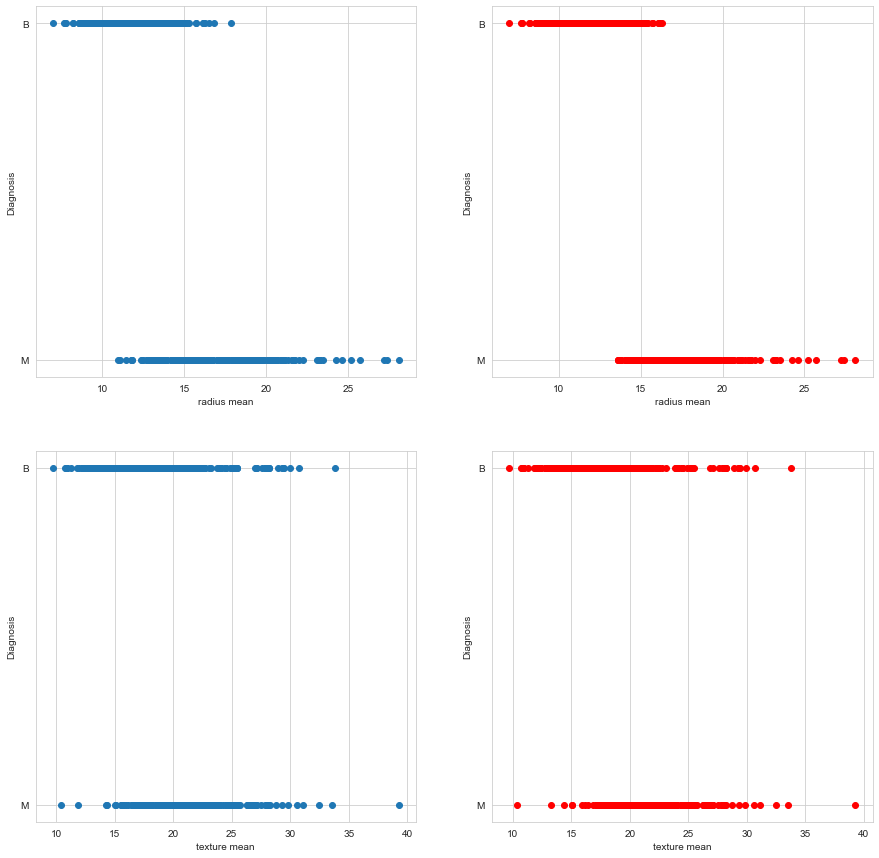

In [10]:
y_data = y.reshape(1,569)
fig, ax = plt.subplots(2, 2)
fig.set_facecolor('white')
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0,0].set(ylabel="Diagnosis", xlabel='radius mean')
ax[0,0].scatter(x=df['radius_mean'], y=y_data[0])
ax[0,1].set(ylabel="Diagnosis", xlabel='radius mean')
ax[0,1].scatter(x=df['radius_mean'], y=model.predict(x), color='red')

ax[1,0].set(ylabel="Diagnosis", xlabel='texture mean')
ax[1,0].scatter(x=df['texture_mean'], y=y_data[0])
ax[1,1].set(ylabel="Diagnosis", xlabel='texture mean')
ax[1,1].scatter(x=df['texture_mean'], y=model.predict(x), color='red')
plt.show()

In [11]:
predicted_y = model.predict(x)
list(predicted_y).count('B')
list(y).count('B')

357

In [12]:
cf_matrix = confusion_matrix(y, predicted_y)

[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

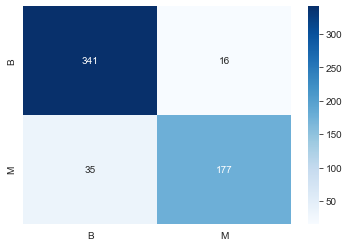

In [13]:
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['B', 'M'])
ax.yaxis.set_ticklabels(['B', 'M'])

In [24]:
f1_score(y.reshape(1, 569)[0], predicted_y, average='macro')

0.9022484967914708